# Dynamic Time Warping Tutorial

In this tutorial, we'll show how to use the `cdtw` package to run fast Dynamic Time Warping algorithms in Python.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import cdtw

## Generate data

Let's generate two signals of different sizes such that you cannot simply subtract one from another to find the difference.

The task is to warp two signals together and find the distance between them (the difference, if you will).

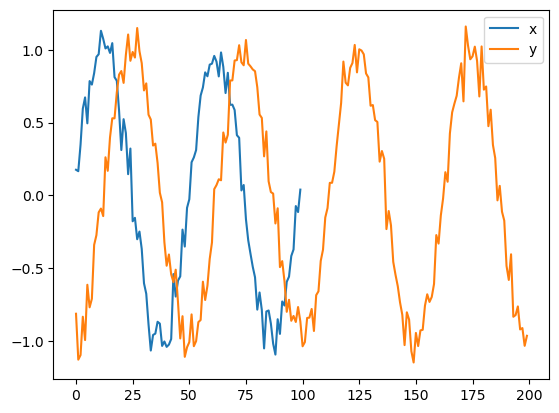

In [2]:
np.random.seed(0)
Nx, Ny = 100, 200
tx = np.linspace(0, 4*np.pi, Nx)
ty = np.linspace(0, 4*np.pi, Ny)
x = np.sin(tx) + np.random.randn(Nx) * 0.1
y = np.sin(2*ty - 0.5 * np.pi) + np.random.randn(Ny) * 0.1
plt.plot(x, label='x')
plt.plot(y, label='y')
plt.legend();

## Compute the DTW distance

In [3]:
cdtw.dtw_dist(x, y)

7.152381420135498

## Find the best alignment (warping) between 'x' and 'y'

To align `x` to `y` or vice versa, we need to compute the DTW distance matrix and then find the best warping path.

In [4]:
dist_matrix = cdtw.dtw_mat(x, y)
print(dist_matrix.shape)

(100, 200)


The warping path size is always larger than the largest size of the input arrays, and an exception would be a trivial case of warping the signal with itself.

In [5]:
warp_path = cdtw.dtw_path(dist_matrix)
print(warp_path.shape)

(222, 2)


### Plot the cost matrix and the found path

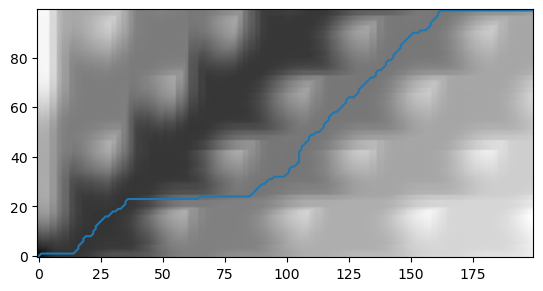

In [6]:
dist_matrix = cdtw.dtw_mat(x, y)
warp_path = cdtw.dtw_path(dist_matrix)
ii, jj = warp_path.T
plt.imshow(dist_matrix, origin='lower', cmap='gray')
plt.plot(jj, ii);

Note that the warping path does not necesserily follow the hollow (the black area) of the cost matrix. This is because, by definition, it must end in the upper right corner. And if we enlarge the last row (the top one), you'll see that the black area does not end in the upper right corner, which is gray.

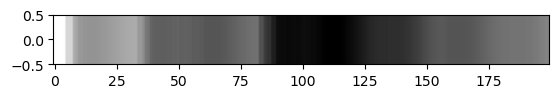

In [7]:
plt.imshow(dist_matrix[-1:, :], origin='lower', cmap='gray', aspect=20);

### Plot aligned signals

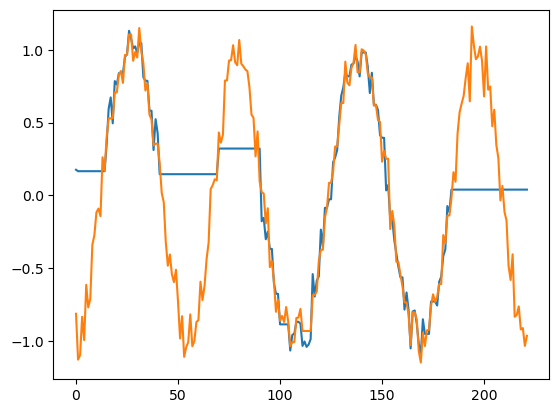

In [8]:
plt.plot(x[ii])
plt.plot(y[jj])

### Verify the total cost

In [9]:
warped_cost = np.sum(np.square(x[ii] - y[jj])) ** 0.5
print(warped_cost)
print(cdtw.dtw_dist(x, y))

7.152380923019677
7.152381420135498
